In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_excel('TrainExer61.xlsx')

In [4]:
df.head()

,EPSX,EPSY,X,Y
0,-2.447232,-1.421835,0.000000,0.000000
1,-1.540471,-0.632123,-1.540471,-0.632123
2,1.284912,-1.997182,-0.255559,-2.629304
3,-0.854495,0.174588,-1.110054,-2.454717
4,0.959860,-2.087111,-0.150194,-4.541828


### Part (a)

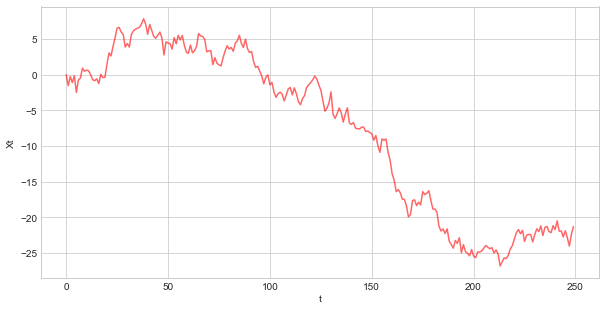

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['X'], c='r', alpha=0.6)
plt.xlabel('t')
plt.ylabel('Xt');

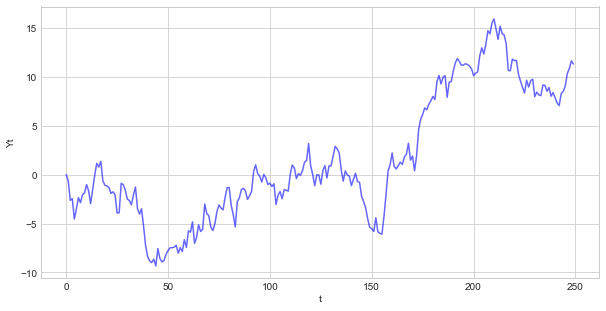

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df['Y'], c='b', alpha=0.6)
plt.xlabel('t')
plt.ylabel('Yt');

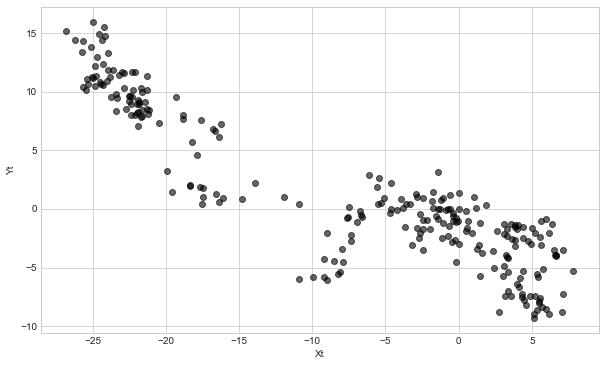

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['X'], df['Y'], c='k', alpha=0.6)
plt.xlabel('Xt')
plt.ylabel('Yt');

### Part (b)

In [25]:
import statsmodels.api as sm

In [26]:
X = sm.add_constant(df['EPSX'])
reg = sm.OLS(df['EPSY'], X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EPSY   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.736
Date:                Fri, 25 May 2018   Prob (F-statistic):              0.189
Time:                        01:27:13   Log-Likelihood:                -357.26
No. Observations:                 250   AIC:                             718.5
Df Residuals:                     248   BIC:                             725.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.064      0.484      0.629      -0.096       0.158
EPSX          -0.0879      0.067     -1.318      0.189      -0.219       0.043
==============================================================================
Omnibus:                        0.125   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.024
Skew:                           0.016   Prob(JB):                        0.988
Kurtosis:                       3.036   Cond. No.                         1.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Part (c)

In [31]:
df['EPSX_1'], df['EPSX_2'], df['EPSX_3'] = df['EPSX'].shift(1), df['EPSX'].shift(2), df['EPSX'].shift(3)
df['EPSY_1'], df['EPSY_2'], df['EPSY_3'] = df['EPSY'].shift(1), df['EPSY'].shift(2), df['EPSY'].shift(3)

In [37]:
X = sm.add_constant(df[['EPSX', 'EPSX_1', 'EPSX_2', 'EPSX_3', 'EPSY_1', 'EPSY_2', 'EPSY_3']])
reg = sm.OLS(df['EPSY'][3:], X[3:]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EPSY   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5457
Date:                Fri, 25 May 2018   Prob (F-statistic):              0.799
Time:                        01:54:33   Log-Likelihood:                -350.05
No. Observations:                 247   AIC:                             716.1
Df Residuals:                     239   BIC:                             744.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0462      0.066      0.698      0.486      -0.084       0.176
EPSX          -0.0973      0.069     -1.405      0.161      -0.234       0.039
EPSX_1         0.0199      0.070      0.284      0.777      -0.118       0.158
EPSX_2        -0.0596      0.070     -0.857      0.392      -0.197       0.077
EPSX_3         0.0095      0.068      0.138      0.890      -0.125       0.144
EPSY_1         0.0248      0.064      0.387      0.699      -0.102       0.151
EPSY_2        -0.0158      0.065     -0.244      0.807      -0.143       0.112
EPSY_3        -0.0472      0.064     -0.734      0.464      -0.174       0.080
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.037
Skew:                           0.028   Prob(JB):                        0.982
Kurtosis:                       3.022   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""